In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

### Missing values

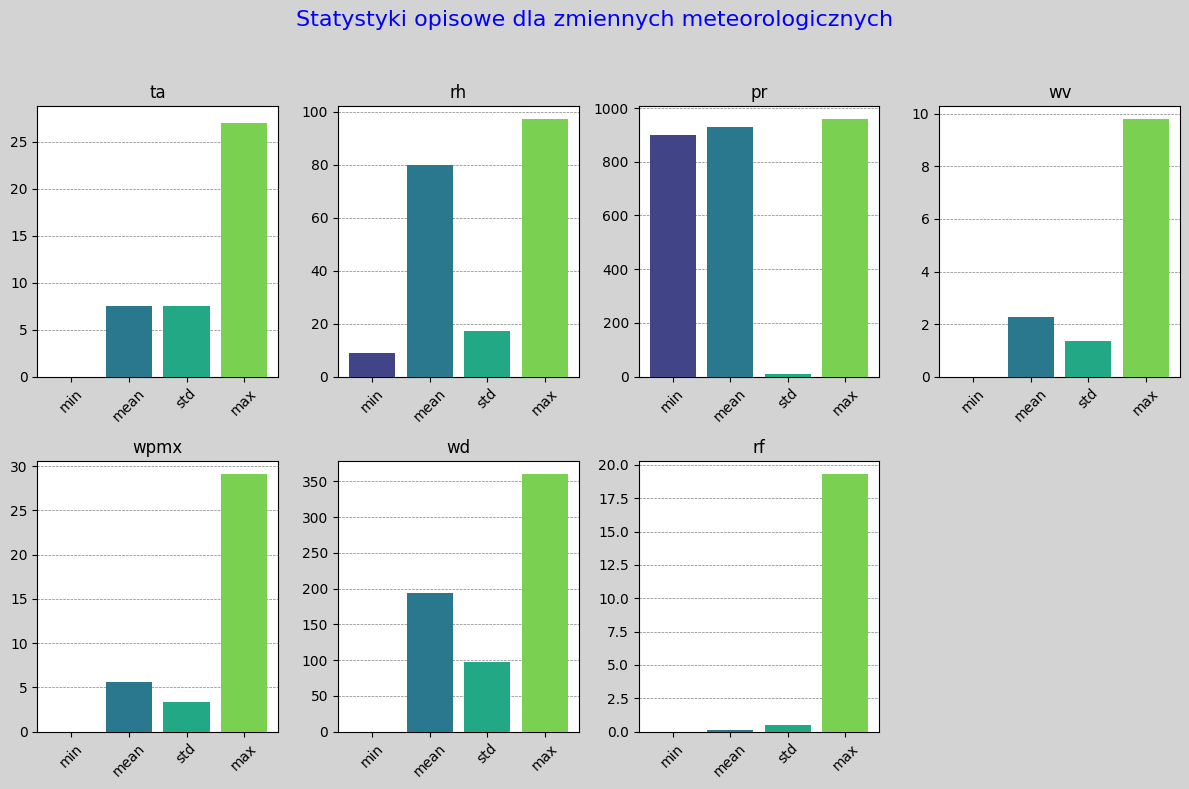

In [75]:
brenna_meteo = pd.read_csv('brenna_meteo_2020.csv', sep=';')
brenna_meteo['date'] = pd.to_datetime(brenna_meteo['date'], format='%Y-%m-%d %H:%M')


df = brenna_meteo
for col in ['ta', 'rh', 'pr', 'wv', 'wpmx', 'wd', 'rf']:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Statystyki opisowe
desc = df.describe().T[['min', 'mean', 'std', 'max']].round(2)
desc = desc.drop(index='date', errors='ignore')
features = desc.index.tolist()

# Parametry siatki wykresów
n = len(features)
import math
cols = math.ceil(n / 2)  # np. jeśli 7 zmiennych -> 4 kolumny
rows = 2

# Tworzenie subplotów
fig, axes = plt.subplots(rows, cols, figsize=(3*cols, 4*rows), facecolor='lightgrey')
axes = axes.flatten()  # Spłaszczamy, żeby łatwo iterować

colors = sns.color_palette("viridis", n_colors=4)
# Tworzenie wykresów
for i, feature in enumerate(features):
    stats = desc.loc[feature]
    axes[i].bar(stats.index, stats.values, color=colors, zorder=3)
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(bottom=0)
    axes[i].grid(True, which='both', axis='y', linestyle='--', color='gray', linewidth=0.5, zorder=0)  # Siatka dla osi Y


# Ukrycie niewykorzystanych subplotów (jeśli są)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Całościowy tytuł
plt.suptitle("Statystyki opisowe dla zmiennych meteorologicznych", fontsize=16,  color='blue')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

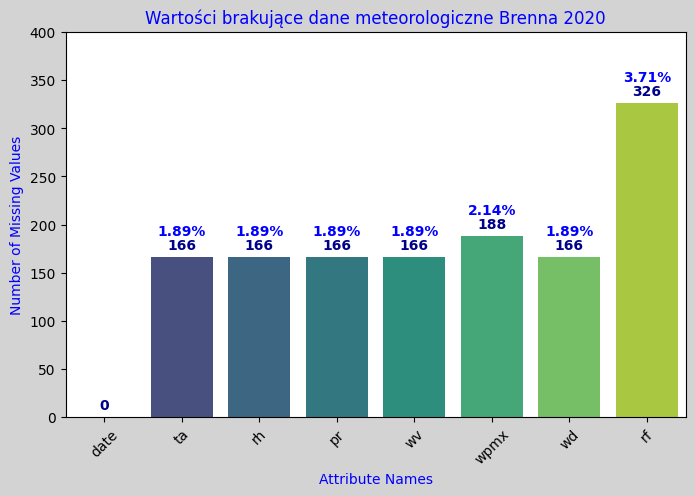

date      0
ta      166
rh      166
pr      166
wv      166
wpmx    188
wd      166
rf      326
dtype: int64


In [43]:
null_counts = brenna_meteo.isnull().sum()
nullValues_percent = brenna_meteo.isnull().mean() * 100

plt.figure(figsize=(8, 5), facecolor='lightgrey')
ax = sns.barplot(
    x=null_counts.index,
    y=null_counts.values,
    palette="viridis",
    hue=null_counts.index)
ax.set_facecolor('white')
for i, v in enumerate(null_counts.values):
    ax.text(
        i,
        v + 5,
        str(v),
        ha='center',
        va='bottom',
        fontweight='bold',
        color='darkblue')
for i, v in enumerate(nullValues_percent.values):
    if v > 0:
        ax.text(i,
                null_counts.iloc[i] + 20,
                str(format(float(v),
                           ".2f")) + "%",
                ha='center',
                va='bottom',
                fontweight='bold',
                color='blue')
    else:
        continue

plt.ylim(0, 400)
plt.title("Wartości brakujące dane meteorologiczne Brenna 2020", color='blue')
plt.xlabel("Attribute Names", color='blue')
plt.ylabel("Number of Missing Values", color='blue')
plt.xticks(rotation=45)
plt.show()
print(null_counts)

In [71]:
print(len(brenna_meteo))
print(len(brenna_meteo.columns))
brenna_meteo.head()
brenna_meteo.index = pd.to_datetime(brenna_meteo['date'], format='%Y-%m-%d %H:%M')

8784
8


In [45]:
print(brenna_meteo[brenna_meteo['date'].isna()])
brenna_meteo.head()
print(brenna_meteo.dtypes)
print(brenna_meteo['rf'].unique())


Empty DataFrame
Columns: [date, ta, rh, pr, wv, wpmx, wd, rf]
Index: []
date    datetime64[ns]
ta             float64
rh             float64
pr             float64
wv             float64
wpmx           float64
wd             float64
rf             float64
dtype: object
[ nan  0.   0.3  0.2  0.4  1.4  0.8  0.1  0.5  0.7  0.6  2.2  1.1  1.3
  1.5  1.6  1.9  1.8  2.5  1.2  1.   0.9  1.7  2.   2.4  5.4  2.7  3.
  2.3  8.3  7.5  4.8  2.1  4.2  2.9  5.5  3.2  3.3  3.8  3.4  2.8  6.2
  6.   3.5  3.7  5.8 14.9 19.3  3.1  6.1  5.   3.9  8.6  4.7  4.3  4.
  3.6  2.6  5.3]


In [78]:
# interpolacja liniowa brakujacych danych w przypadku tmp - wd a rf 
# Interpolacja dla zmiennych numerycznych
brenna_meteo.index = pd.to_datetime(brenna_meteo.index)
for col in brenna_meteo.columns:
    brenna_meteo[col] = brenna_meteo[col].astype(str)
    brenna_meteo[col] = brenna_meteo[col].str.replace(',', '.')
    brenna_meteo[col] = pd.to_numeric(brenna_meteo[col], errors='coerce')
print(brenna_meteo.dtypes)
brenna_meteo[['ta', 'rh', 'pr', 'wv', 'wpmx', 'wd']] = brenna_meteo[['ta', 'rh', 'pr', 'wv', 'wpmx', 'wd']].interpolate(method='time')
brenna_meteo['rf'] = brenna_meteo['rf'].fillna(0)


date    float64
ta      float64
rh      float64
pr      float64
wv      float64
wpmx    float64
wd      float64
rf      float64
dtype: object


Liczba etykiet zmiennej ta        :   496
Liczba etykiet zmiennej rh        :   869
Liczba etykiet zmiennej pr        :   647
Liczba etykiet zmiennej wv        :   169
Liczba etykiet zmiennej wpmx      :   389
Liczba etykiet zmiennej wd        :   360
Liczba etykiet zmiennej rf        :    58
Liczba etykiet zmiennej rf_bin    :     2
Liczba etykiet zmiennej wd_cat    :     4
Liczba etykiet zmiennej season    :     4


C:\Users\barte\AppData\Local\Temp\ipykernel_9392\1061331900.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


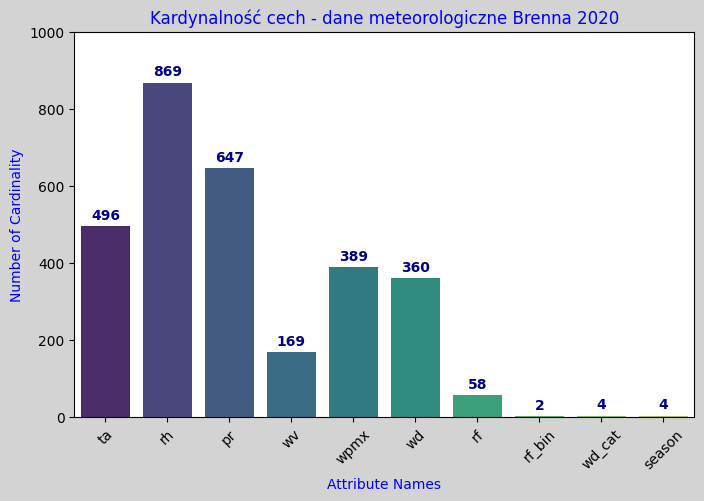

date      0
ta      166
rh      166
pr      166
wv      166
wpmx    188
wd      166
rf      326
dtype: int64
date      :  8784
ta        :   496
rh        :   869
pr        :   647
wv        :   169
wpmx      :   389
wd        :   360
rf        :    58
rf_bin    :     2
wd_cat    :     4
season    :     4


In [60]:
headers = brenna_meteo.columns.tolist()
cardinality = {}
for habit in headers:
    if habit == 'date':
        continue
    tmp = len(brenna_meteo[habit].unique())
    cardinality[habit] = tmp
    print(f'Liczba etykiet zmiennej {habit:<10}: {tmp:>5}')


headers_without_date = headers.copy()
headers_without_date.remove('date')
plt.figure(figsize=(8, 5), facecolor='lightgrey')
ax = sns.barplot(
    x=headers_without_date,
    y=list(cardinality.values()),
    palette="viridis"
)
ax.set_facecolor('white')
for i, v in enumerate(cardinality.values()):
    ax.text(
        i,
        v + 10,
        str(v),
        ha='center',
        va='bottom',
        fontweight='bold',
        color='darkblue')

plt.ylim(0, 1000)
plt.title("Kardynalność cech - dane meteorologiczne Brenna 2020", color='blue')
plt.xlabel("Attribute Names", color='blue')
plt.ylabel("Number of Cardinality", color='blue')
plt.xticks(rotation=45)
plt.show()
print(null_counts)

cardinality = {}
for habit in headers: 
    tmp = len(brenna_meteo[habit].unique())
    cardinality[habit] = tmp
    print(f'{habit:<10}: {tmp:>5}')

In [51]:
# cardintlity reduction
# brenna_meteo['rf'] = brenna_meteo['rf'].apply(lambda x: 0 if x == '0' or pd.isna(x) else 1)
brenna_meteo['wd'] = brenna_meteo['wd'].astype(int)

ta      float64
rh      float64
pr      float64
wv      float64
wpmx    float64
wd        int64
rf        int64
dtype: object


C:\Users\barte\AppData\Local\Temp\ipykernel_9416\3579367672.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=brenna_meteo, x=feature, palette=[palette[i]])
C:\Users\barte\AppData\Local\Temp\ipykernel_9416\3579367672.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=brenna_meteo, x=feature, palette=[palette[i]])
C:\Users\barte\AppData\Local\Temp\ipykernel_9416\3579367672.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=brenna_meteo, x=feature, palette=[palette[i]])
C:\Users\barte\AppData\Local\Temp\ipykernel_9416\357

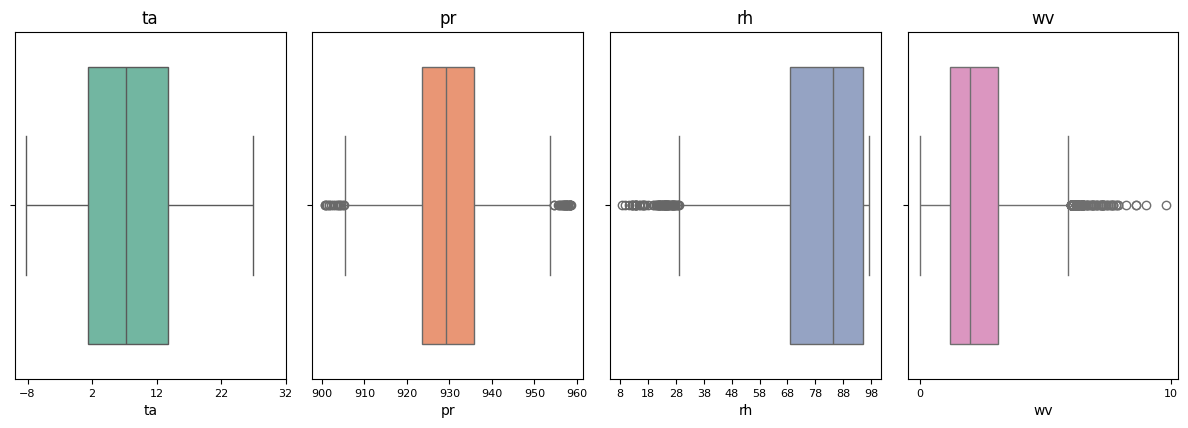

In [157]:
features = ['ta', 'pr', 'rh', 'wv']
print(brenna_meteo.dtypes)

# Ustawienie wykresu
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set2", len(features)) 

# Tworzymy wykres pudełkowy dla każdej zmiennej
for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)  # Ustawiamy wykresy w siatce 2x4
    sns.boxplot(data=brenna_meteo, x=feature, palette=[palette[i]])
    plt.title(f'{feature}')
    plt.xlabel(f'{feature}')
    min_val = min(brenna_meteo[feature])
    max_val = max(brenna_meteo[feature])
    ticks = range(int(min_val), int(max_val)+10, 10)  # Zakładamy krok co 10
    plt.xticks(ticks, fontsize=8)  # Ustawienie etykiet na osi Y

plt.tight_layout()
plt.show()

In [59]:
# brenna_meteo['rf_bin'] = brenna_meteo['rf'].apply(lambda x: 0 if x == 0 else 1)

def fun(x):
    if x >= 315 or x < 45: return 1
    elif x >= 45 and x < 135: return 2
    elif x >= 135 and x < 225: return 3
    elif x >= 225 and x < 315: return 4

brenna_meteo['wd_cat'] = brenna_meteo['wd'].apply(lambda x: fun(x))

# brenna_meteo.index = pd.to_datetime(brenna_meteo.index)
# brenna_meteo['season'] = brenna_meteo.index.month.map({
#     1: 1, 2: 1, 3: 2, 4: 2, 5: 2,
#     6: 3, 7: 3, 8: 3, 9: 4, 10: 4,
#     11: 4, 12: 1
# })

In [79]:
brenna_meteo = brenna_meteo.groupby(brenna_meteo.index.date).agg({
    'ta': 'mean',
    'rh': 'mean',
    'pr': ['min', 'max', 'mean'],  # min i max ciśnienie + mean dla innych modeli
    'wv': 'mean',
    'wpmx': 'max',
    'wd': 'mean',
    'rf': 'max'
})

# Po agregacji mamy MultiIndex w kolumnach -> trzeba spłaszczyć
brenna_meteo.columns = ['_'.join(col).strip() for col in brenna_meteo.columns.values]
brenna_meteo.index = pd.to_datetime(brenna_meteo.index)

# Dodanie kolumny różnicy ciśnienia
brenna_meteo['pr_delta'] = brenna_meteo['pr_max'] - brenna_meteo['pr_min']


print(brenna_meteo.head())

brenna_meteo.index = pd.to_datetime(brenna_meteo.index)
brenna_meteo['season'] = brenna_meteo.index.month.map({
    1: 1, 2: 1, 3: 2, 4: 2, 5: 2,
    6: 3, 7: 3, 8: 3, 9: 4, 10: 4,
    11: 4, 12: 1
})



# print(brenna_meteo.dtypes)
print(brenna_meteo.head())

             ta_mean    rh_mean  pr_min  pr_max     pr_mean   wv_mean  \
1970-01-01  7.724892  79.799283   900.7   958.6  929.590266  2.258299   

            wpmx_max    wd_mean  rf_max  pr_delta  
1970-01-01      29.1  193.85551    19.3      57.9  
             ta_mean    rh_mean  pr_min  pr_max     pr_mean   wv_mean  \
1970-01-01  7.724892  79.799283   900.7   958.6  929.590266  2.258299   

            wpmx_max    wd_mean  rf_max  pr_delta  season  
1970-01-01      29.1  193.85551    19.3      57.9       1  


In [82]:
# brenna_meteo['delta_pr'] = brenna_meteo['pr'].diff()

# brenna_meteo['wv'] = brenna_meteo['wv'].astype(int)
# brenna_meteo['wd'] = np.cos(brenna_meteo['wd'] * np.pi / 180)

y = brenna_meteo['ta_mean']
X = brenna_meteo[['wpmx_max', 'wv_mean', 'season', 'pr_mean', 'rh_mean']]
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=59)


model = sk.linear_model.LinearRegression()
# model = sk.tree.DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
    
# sk.tree.plot_tree(model)

ValueError: With n_samples=1, test_size=0.3 and train_size=0.7, the resulting train set will be empty. Adjust any of the aforementioned parameters.

           ta_mean   rh_mean    pr_min    pr_max   pr_mean   wv_mean  \
ta_mean   1.000000 -0.235466 -0.393955 -0.453463 -0.430762 -0.311842   
rh_mean  -0.235466  1.000000 -0.045495 -0.149342 -0.091157  0.002153   
pr_min   -0.393955 -0.045495  1.000000  0.930341  0.981320 -0.173463   
pr_max   -0.453463 -0.149342  0.930341  1.000000  0.977472 -0.099586   
pr_mean  -0.430762 -0.091157  0.981320  0.977472  1.000000 -0.144196   
wv_mean  -0.311842  0.002153 -0.173463 -0.099586 -0.144196  1.000000   
wpmx_max -0.222734 -0.006793 -0.239878 -0.150002 -0.197836  0.857499   
wd_mean  -0.166839  0.227563 -0.048179 -0.061013 -0.056035  0.152672   
rf_max    0.108905  0.238794 -0.222172 -0.213775 -0.218097  0.000160   
pr_delta -0.106258 -0.264234 -0.303733  0.066797 -0.130447  0.213239   
season    0.521185  0.127916 -0.050245 -0.139260 -0.099281 -0.307465   

          wpmx_max   wd_mean    rf_max  pr_delta    season  
ta_mean  -0.222734 -0.166839  0.108905 -0.106258  0.521185  
rh_mean  -0.0

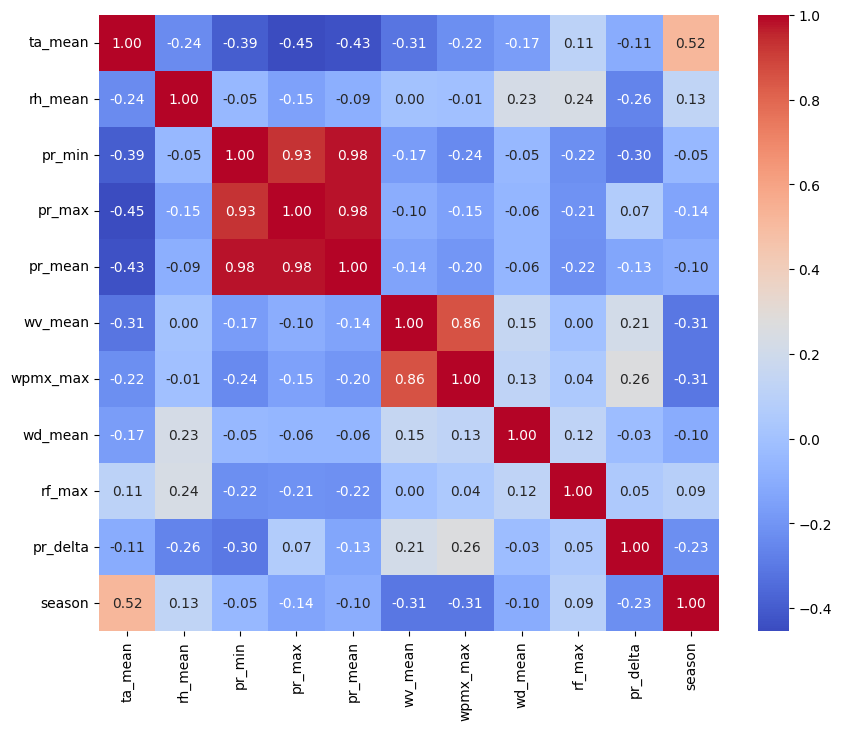

In [73]:
correlation_matrix = brenna_meteo.corr()

# wyświetl korelacje w formie tabeli
print(correlation_matrix)

# (opcjonalnie) narysuj ładną mapę korelacji
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

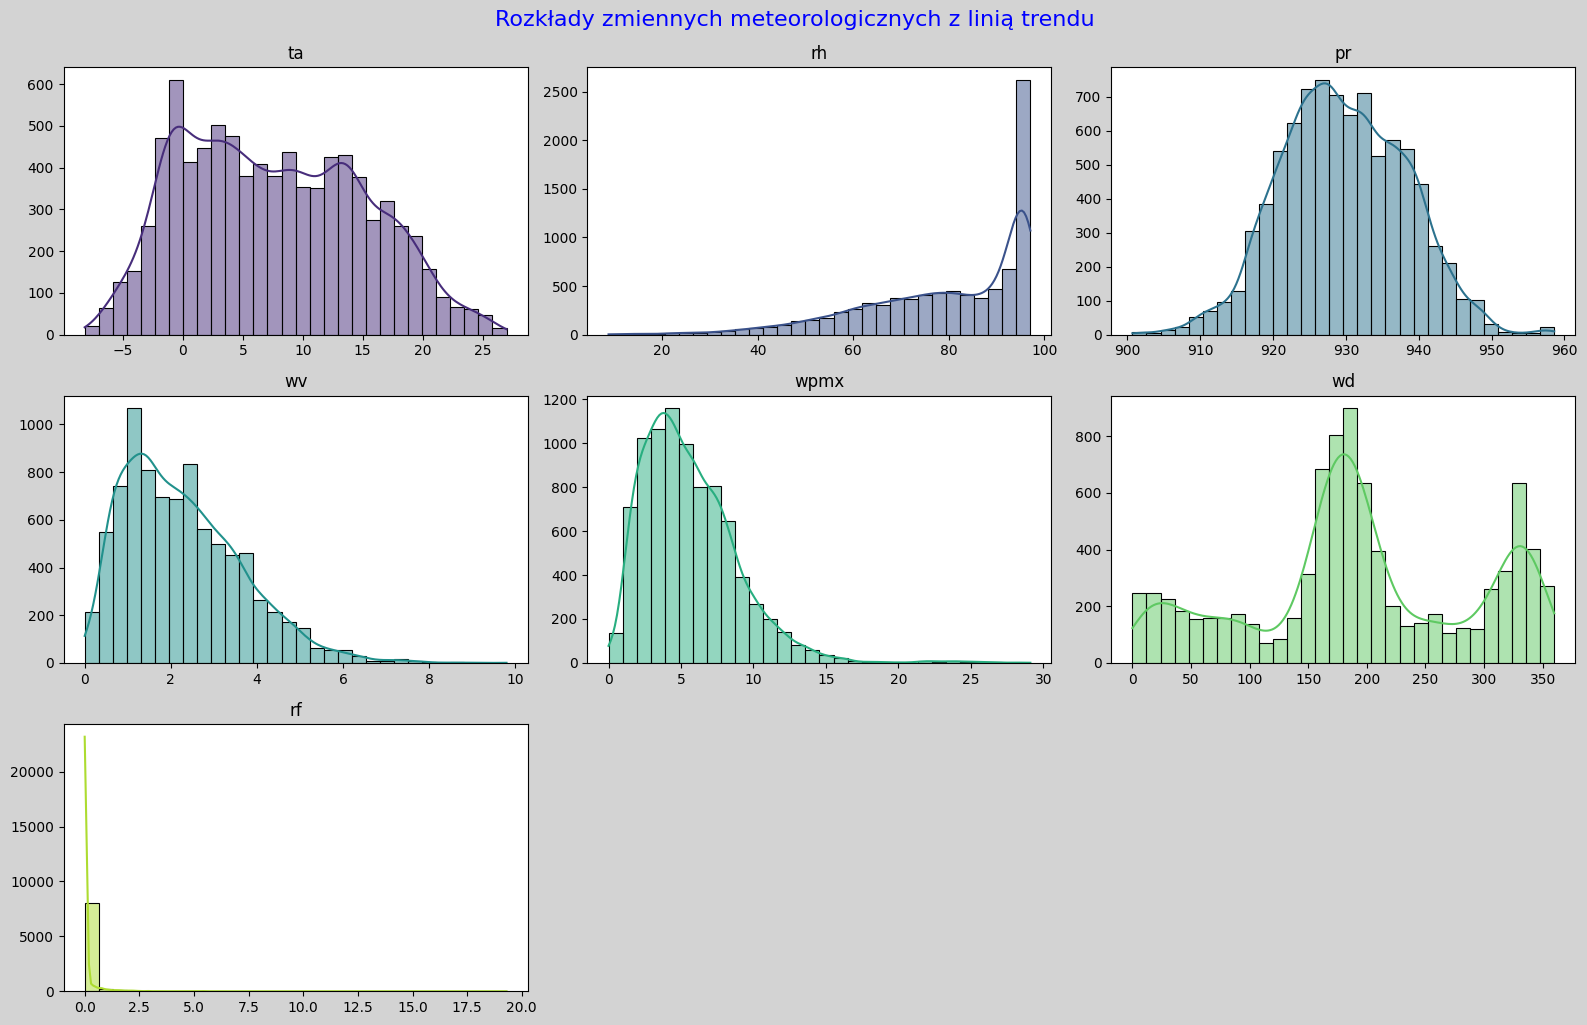

In [69]:
num_cols = ['ta', 'rh', 'pr', 'wv', 'wpmx', 'wd', 'rf']

colors = sns.color_palette("viridis", n_colors=len(num_cols))

# Ustawienia wykresów
plt.figure(figsize=(16, 10), facecolor='lightgrey')
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # siatka 3x3 (zapas na ewentualne inne zmienne)
    sns.histplot(data=brenna_meteo, x=col, kde=True, bins=30, color=colors[i - 1])
    plt.title(f'{col}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle("Rozkłady zmiennych meteorologicznych z linią trendu", fontsize=16, y=1.02, color='blue')
plt.show()

In [90]:
# Calculate accuracy
accuracy = sk.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get the classification report (precision, recall, f1-score, support)
print("Classification Report:")
print(sk.metrics.classification_report(y_test, y_pred))

# Confusion matrix to see the True Positives, False Positives, etc.
print("Confusion Matrix:")
print(sk.metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78        61
           1       0.73      0.67      0.70        48

    accuracy                           0.74       109
   macro avg       0.74      0.73      0.74       109
weighted avg       0.74      0.74      0.74       109

Confusion Matrix:
[[49 12]
 [16 32]]
